In [1]:
import pandas as pd
import cobra
import cameo
from analysis_model import *
from bilansC import *
import escher
from cameo.flux_analysis.simulation import room, lmoma
from numpy import fabs
import seaborn as sns

In [2]:
show_escher = False
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
pd.options.display.column_space = 1000

In [22]:
wd = '/Users/aalarcon/Documents/Jupyter/3_Isopropanol/'
scen = ['WT', 'WT_PFL', 'WT_PTA', 'WT_PPC', 'WT_ADH', 'WT_PYK']
react_ko = {'WT':None, 'WT_PFL':'PFL', 'WT_PTA':'PTAr', 'WT_PPC':'PPC', 'WT_ADH':'LDH_D', 'WT_PYK':'PYK'}

In [23]:
model_WT =  cameo.load_model(wd+'files/models/model_WT_Acetone_iML1515.xml')
model_WT.solver = 'glpk'

In [24]:
reaction_data_pfba = {}
model = {}

for s in scen:
    model[s] = model_WT.copy()
    model[s].reactions.EX_o2_e.bounds = (-10,0)
    if s != 'WT':
        model[s].reactions.get_by_id(react_ko[s]).bounds = (0,0)
    reaction_data_pfba[s] = cameo.pfba(model[s]).fluxes

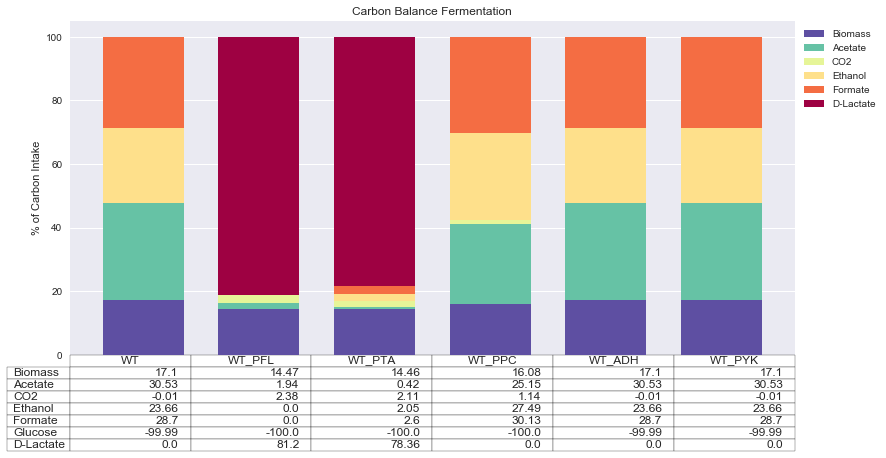

In [16]:
fig = bilanC(data_model=reaction_data_pfba, model=model_WT, scen_model=scen, figsize=(13,8))

In [25]:
met = 'nadph_c'
bilan_metabolite(met, reaction_data_pfba, model[scen[-1]], threshold=5, scen=scen,
                 show_name=False, show_reaction=True, show_genes=False)

,WT,WT_PFL,WT_PTA,WT_PPC,WT_ADH,WT_PYK,reaction
SULR,-1.9,-1.6,-1.6,-1.8,-1.9,-1.9,5.0 h_c + 3.0 nadph_c + so3_c --> 3.0 h2o_c + h2s_c + 3.0 nadp_c
HSDy,-1.7,-1.5,-1.5,-1.6,-1.7,-1.7,hom__L_c + nadp_c <=> aspsa_c + h_c + nadph_c
THD2pp,30.1,25.3,-0,28.3,30.1,30.1,2.0 h_p + nadh_c + nadp_c --> 2.0 h_c + nad_c + nadph_c
GLUDy,-20.9,-17.8,-17.6,-19.6,-20.9,-20.9,glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + nadph_c + nh4_c
SHK3Dr,-0.9,-0.8,-0.8,-0.9,-0.9,-0.9,3dhsk_c + h_c + nadph_c <=> nadp_c + skm_c
ASAD,-2.6,-2.2,-2.2,-2.5,-2.6,-2.6,aspsa_c + nadp_c + pi_c <=> 4pasp_c + h_c + nadph_c
DHDPRy,-0.9,-0.8,-0.8,-0.9,-0.9,-0.9,23dhdp_c + h_c + nadph_c --> nadp_c + thdp_c
GND,0,-0,12.7,0,0,0,6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c
KARA1,-2.1,-1.8,-1.8,-2,-2.1,-2.1,23dhmb_c + nadp_c <=> alac__S_c + h_c + nadph_c
G6PDH2r,0,-0,12.7,0,0,0,g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c


In [7]:
fig.savefig('/Users/aalarcon/Desktop/figs_reunion/valid_WT.png')

In [20]:
scen = ['PKT', 'PKT_PFL', 'PKT_PTA', 'PKT_PPC', 'PKT_ADH', 'PKT_PYK']
react_ko = {'PKT':None, 'PKT_PFL':'PFL', 'PKT_PTA':'PTAr', 'PKT_PPC':'PPC', 'PKT_ADH':'LDH_D', 'PKT_PYK':'PYK'}
model_PKT =  cobra.io.read_sbml_model(wd+'files/models/model_PKT_Acetone_iML1515.xml')
model_PKT.solver = 'glpk'
reaction_data_pfba = {}
model = {}

for s in scen:
    model[s] = model_PKT.copy()
    model[s].reactions.EX_o2_e.bounds = (-10,0)
    if s != 'PKT':
        model[s].reactions.get_by_id(react_ko[s]).bounds = (0,0)
    reaction_data_pfba[s] = cameo.pfba(model[s]).fluxes

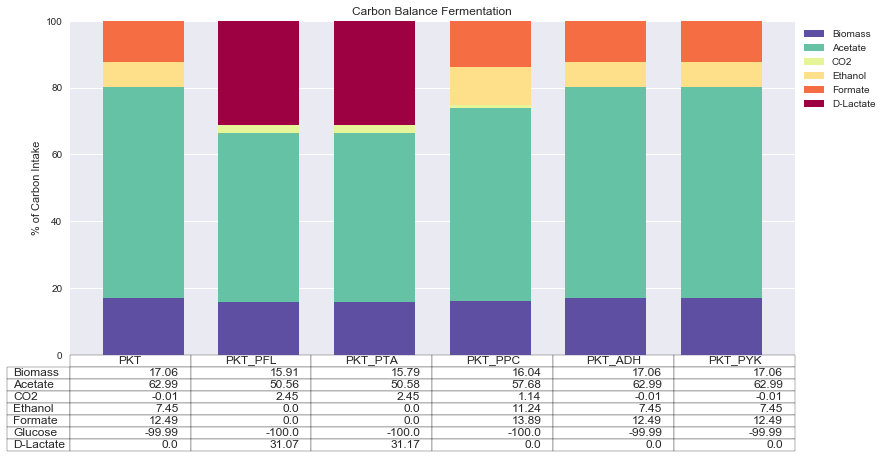

In [11]:
fig = bilanC(data_model=reaction_data_pfba, model=model_WT, scen_model=scen, figsize=(13,8))

In [12]:
#fig.savefig('/Users/aalarcon/Desktop/figs_reunion/valid_PKT.png')

In [21]:
met = 'nadh_c'
bilan_metabolite(met, reaction_data_pfba, model[scen[-1]], threshold=5, scen=scen,
                 show_name=False, show_reaction=True, show_genes=False)

,PKT,PKT_PFL,PKT_PTA,PKT_PPC,PKT_ADH,PKT_PYK,reaction
ACALD,-22.3,0,-4.1,-33.7,-22.3,-22.3,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
MDH,2.6,2.4,2.4,16.2,2.6,2.6,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
LDH_D,0,-62.1,-62.3,0,0,0,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
FADRx,-5,-4.7,-4.7,-4.7,-5,-5,fad_c + h_c + nadh_c --> fadh2_c + nad_c
PDH,-0,14.7,14.6,0,-0,-0,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
NADH16pp,-19.2,-19.2,-19.2,-12.4,-19.2,-19.2,4.0 h_c + nadh_c + q8_c --> 3.0 h_p + nad_c + q8h2_c
IPMD,1.1,1,1,1,1.1,1.1,3c2hmp_c + nad_c --> 3c4mop_c + h_c + nadh_c
PGCD,4,3.8,3.8,3.7,4,4,3pg_c + nad_c --> 3php_c + h_c + nadh_c
GAPD,95.7,96,96,95.9,95.7,95.7,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
THD2pp,-30,-27.8,-23.6,-28.2,-30,-30,2.0 h_p + nadh_c + nadp_c --> 2.0 h_c + nad_c + nadph_c
